In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


In [2]:
df = pd.read_excel("Dataset_Quitosana_Adsorcao.xlsx") # lê o arquivo excel 

df = df.drop(['Unnamed: 6', "Artigos", "Experimento"], axis=1) # remove colunas desnecessárias

# df = pd.get_dummies(df, columns=['Modificação'], dtype=int) # Transforma a coluna "Modificação" (categorica) em colunas numéricas 

# Transforma dados categoricos em numéricos
conversion = {
    "Sim": 0,
    "Não": 1
}

df["Modificação_num"] = df["Modificação"].map(conversion) 
df.head()

,Modificação,Concentração Inicial (mg/L),Dose de adsorvente (g/L),pH,Remoção (%),Modificação_num
0,Não,20.0,3.0,6.0,59.7,1
1,Não,60.0,3.0,6.0,90.6,1
2,Não,60.0,5.0,6.0,93.5,1
3,Não,60.0,3.0,6.0,90.6,1
4,Não,20.0,5.0,6.0,99.7,1


In [3]:
# Definições para os treinamentos

random_seed = 42

features = ['Modificação_num', 'Concentração Inicial (mg/L)', 'Dose de adsorvente (g/L)', 'pH']
target = ['Remoção (%)']

indices = df.index

train_indices, test_indices = train_test_split(indices, test_size=0.1, random_state = random_seed)

df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

X_train = df_train.reindex(features, axis=1).values
y_train = df_train.reindex(target, axis=1).values
X_test = df_test.reindex(features, axis=1).values
y_test = df_test.reindex(target, axis=1).values

In [4]:
# Definição dos modelos

baseline_model = DummyRegressor()

linear_model = LinearRegression()

knn_model = KNeighborsRegressor()

dt_model = DecisionTreeRegressor(random_state=random_seed)

rf_model = RandomForestRegressor(random_state=random_seed)

## Baseline Model 

In [5]:
baseline_model.fit(X_train, y_train)

prediction = baseline_model.predict(X_test)

y_true = y_test
y_pred = baseline_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo baseline foi de {RMSE:.4f}%.")

O RMSE do modelo baseline foi de 25.8532%.


## Linear Regression Model

In [6]:
linear_model.fit(X_train, y_train)

prediction = linear_model.predict(X_test)

y_true = y_test
y_pred = linear_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo de regressão linear foi de {RMSE:.4f}%.")

O RMSE do modelo de regressão linear foi de 22.5533%.


## K-NN Model

In [7]:
knn_model.fit(X_train, y_train)

prediction = knn_model.predict(X_test)

y_true = y_test
y_pred = knn_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo k-NN foi de{RMSE:.4f}%.")

O RMSE do modelo k-NN foi de24.6278%.


In [8]:
NUM_NEIGHBORS = [1, 2, 3, 4, 5, 10, 100, 109, 115]

for n in NUM_NEIGHBORS:
    knn_model = KNeighborsRegressor(n_neighbors=n)

    knn_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = knn_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)
    print(f"O RMSE usando k={n} foi de {RMSE:.4f} %.")

O RMSE usando k=1 foi de 19.0962 %.
O RMSE usando k=2 foi de 23.9623 %.
O RMSE usando k=3 foi de 25.5263 %.
O RMSE usando k=4 foi de 22.9684 %.
O RMSE usando k=5 foi de 24.6278 %.
O RMSE usando k=10 foi de 24.9287 %.
O RMSE usando k=100 foi de 25.7041 %.
O RMSE usando k=109 foi de 25.8788 %.
O RMSE usando k=115 foi de 25.9313 %.


In [9]:
# Treinar o modelo novamente com parametros otimizados 
# RMSE com 1 vizinhos = 19.0962%

knn_model = KNeighborsRegressor(n_neighbors=1)

## Decision Tree Model

In [10]:
dt_model.fit(X_train, y_train)

prediction = dt_model.predict(X_test)

y_true = y_test
y_pred = dt_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo DT foi de {RMSE:.4f}%.")

O RMSE do modelo DT foi de 17.5310%.


In [11]:
# Testando hiperparâmetros 

NUM_LEAF_NODES = [None, 6, 36, 50, 100]
NUM_DEPTH = [None, 3, 10, 20, 50]

for n_leaves, n_depth in product(NUM_LEAF_NODES, NUM_DEPTH):
    dt_model = DecisionTreeRegressor(
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
    )

    dt_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = dt_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"O RMSE do modelo DT usando max_leaf_nodes={n_leaves} "
        f"e max_depth={n_depth} foi de {RMSE:.4f}%."
    )

O RMSE do modelo DT usando max_leaf_nodes=None e max_depth=None foi de 17.5310%.
O RMSE do modelo DT usando max_leaf_nodes=None e max_depth=3 foi de 19.9118%.
O RMSE do modelo DT usando max_leaf_nodes=None e max_depth=10 foi de 22.3658%.
O RMSE do modelo DT usando max_leaf_nodes=None e max_depth=20 foi de 17.5310%.
O RMSE do modelo DT usando max_leaf_nodes=None e max_depth=50 foi de 17.5310%.
O RMSE do modelo DT usando max_leaf_nodes=6 e max_depth=None foi de 19.5604%.
O RMSE do modelo DT usando max_leaf_nodes=6 e max_depth=3 foi de 19.5604%.
O RMSE do modelo DT usando max_leaf_nodes=6 e max_depth=10 foi de 19.5604%.
O RMSE do modelo DT usando max_leaf_nodes=6 e max_depth=20 foi de 19.5604%.
O RMSE do modelo DT usando max_leaf_nodes=6 e max_depth=50 foi de 19.5604%.
O RMSE do modelo DT usando max_leaf_nodes=36 e max_depth=None foi de 19.3721%.
O RMSE do modelo DT usando max_leaf_nodes=36 e max_depth=3 foi de 19.9118%.
O RMSE do modelo DT usando max_leaf_nodes=36 e max_depth=10 foi de 1

In [12]:
# Melhor RMSE: 17.5310%

dt_model = DecisionTreeRegressor(
    max_leaf_nodes=None,
    max_depth=None,
    random_state=random_seed,
    )

dt_model.fit(X_train, y_train)

prediction = dt_model.predict(X_test)

y_true = y_test
y_pred = dt_model.predict(X_test)
from sklearn.tree import export_text

text_dt = export_text(
    dt_model,
    feature_names=features,
    decimals=2,
)

print(text_dt)

|--- Concentração Inicial (mg/L) <= 6.25
|   |--- pH <= 2.50
|   |   |--- Concentração Inicial (mg/L) <= 0.62
|   |   |   |--- Dose de adsorvente (g/L) <= 7.00
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Dose de adsorvente (g/L) >  7.00
|   |   |   |   |--- value: [17.30]
|   |   |--- Concentração Inicial (mg/L) >  0.62
|   |   |   |--- value: [20.10]
|   |--- pH >  2.50
|   |   |--- pH <= 4.25
|   |   |   |--- Concentração Inicial (mg/L) <= 1.12
|   |   |   |   |--- Concentração Inicial (mg/L) <= 0.62
|   |   |   |   |   |--- value: [100.00]
|   |   |   |   |--- Concentração Inicial (mg/L) >  0.62
|   |   |   |   |   |--- Dose de adsorvente (g/L) <= 6.00
|   |   |   |   |   |   |--- value: [93.20]
|   |   |   |   |   |--- Dose de adsorvente (g/L) >  6.00
|   |   |   |   |   |   |--- value: [99.00]
|   |   |   |--- Concentração Inicial (mg/L) >  1.12
|   |   |   |   |--- value: [43.33]
|   |   |--- pH >  4.25
|   |   |   |--- pH <= 5.25
|   |   |   |   |--- Dose de adsorvente (

## Random Florest Model

In [13]:
y_train = y_train.ravel()
y_test = y_test.ravel()

rf_model.fit(X_train, y_train)

prediction = rf_model.predict(X_test)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo RF foi de {RMSE:.4f}%.")

O RMSE do modelo RF foi de 19.5121%.


In [14]:
# Testando hiperparametros

NUM_TREES = [1, 10, 100, 300, 350]
NUM_LEAF_NODES = [None, 6]
NUM_DEPTH = [None, 3]

for n_leaves, n_depth, n_trees in product(
    NUM_LEAF_NODES, NUM_DEPTH, NUM_TREES
):
    rf_model = RandomForestRegressor(
        n_estimators=n_trees,
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
        n_jobs=4,
    )

    rf_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = rf_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_trees} max_leaf_nodes={n_leaves} "
        f"e max_depth={n_depth} foi {RMSE:.4f} %."
    )

O RMSE do modelo RF usando n_estimators=1 max_leaf_nodes=None e max_depth=None foi 23.4498 %.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi 23.1596 %.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi 19.5121 %.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi 19.2959 %.
O RMSE do modelo RF usando n_estimators=350 max_leaf_nodes=None e max_depth=None foi 19.2977 %.
O RMSE do modelo RF usando n_estimators=1 max_leaf_nodes=None e max_depth=3 foi 24.1292 %.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi 25.9950 %.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi 24.5407 %.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi 24.4630 %.
O RMSE do modelo RF usando n_estimators=350 max_leaf_nodes=None e max_depth=3 foi 24.5255 %.
O RMSE do modelo RF usando n_estimators=1 max_leaf_nodes=6 e 

In [15]:
# Melhor RMSE: 18.1257%
# Treinando modelo com hiperparametros otimizados

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=random_seed,
    n_jobs=4,
)

rf_model.fit(X_train, y_train)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"O RMSE do modelo RF foi de {RMSE:.4f}%.")

O RMSE do modelo RF foi de 19.5121%.


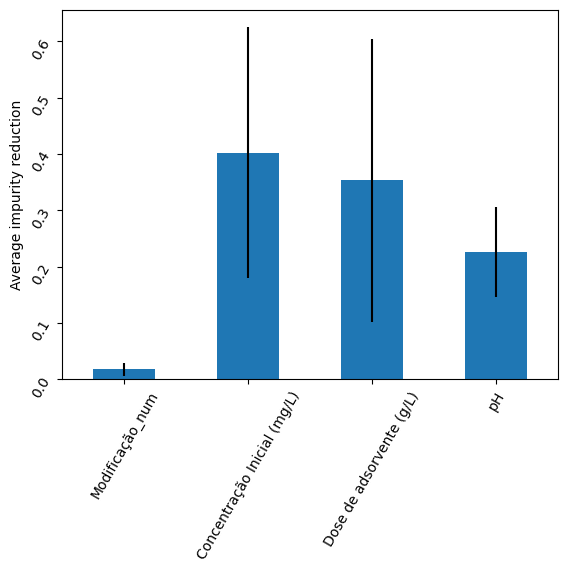

In [16]:
# Verificando importancia das features 

importance = rf_model.feature_importances_
std_dev = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

importance_series = pd.Series(importance, index=features)

fig, axe = plt.subplots()
importance_series.plot.bar(yerr=std_dev, ax=axe)
axe.set_ylabel("Average impurity reduction")
axe.tick_params(rotation = 60)
plt.show()

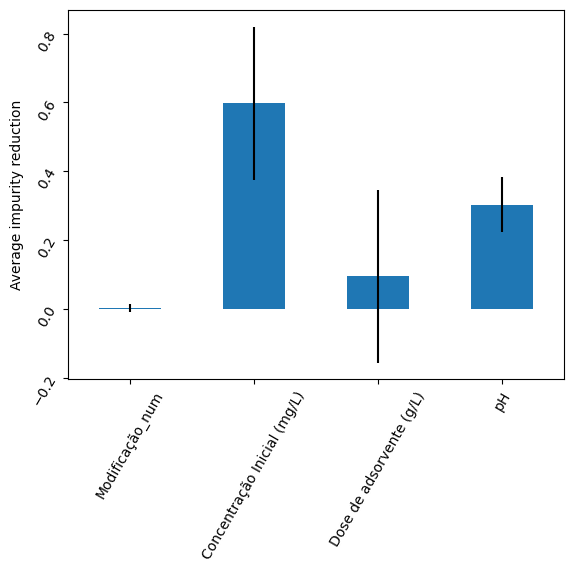

In [19]:
# Verificando importância das features 
importance = dt_model.feature_importances_

# Não há std_dev entre várias árvores
importance_series = pd.Series(importance, index=features)

fig, axe = plt.subplots()
importance_series.plot.bar(yerr=std_dev, ax=axe)
axe.set_ylabel("Average impurity reduction")
axe.tick_params(rotation = 60)
plt.show()

# Testando com dados normalizados

In [20]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train.reshape(-1, 1))

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [21]:
################### MODELO LINEAR

linear_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

prediction = linear_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = linear_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model with normalized data was {RMSE:.4f}%.")

The RMSE of the linear model with normalized data was 22.5533%.


In [22]:
################# MODELO K-NN

knn_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = knn_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = knn_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the k-NN model with normalized data was {RMSE:.4f}%.")


The RMSE of the k-NN model with normalized data was 18.0439%.


In [23]:
################# MODELO ARVORE DE DECISÃO

dt_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = dt_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = dt_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the decision tree model with normalized data was {RMSE:.4f}%.")

The RMSE of the decision tree model with normalized data was 17.5310%.


In [30]:
################# MODELO FLORESTA ALEATÓRIA

rf_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = rf_model.predict(scaler_x.transform(X_train))
# prediction = scaler_y(prediction.reshape(-1, 1))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = rf_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the random florest tree model with normalized data was {RMSE:.4f}%.")


C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The RMSE of the random florest tree model with normalized data was 19.5682%.


In [32]:
################# MODELO FLORESTA ALEATÓRIA

rf_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = rf_model.predict(scaler_x.transform(X_train))
# prediction = scaler_y(prediction.reshape(-1, 1))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))


y_true = y_test
y_pred = rf_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the random florest tree model with normalized data was {RMSE:.4f}%.")


C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The RMSE of the random florest tree model with normalized data was 19.5682%.


In [25]:
# Validação cruzada para o modelo K-NN

from sklearn.model_selection import cross_val_score

NUM_FOLDS = 50 # numero de testes-

scores = cross_val_score(
    knn_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores.mean().reshape(-1, 1)))

Mean score is:  [[-18.38116313]]


In [26]:
# Validação cruzada para o modelo desicion tree

scores2 = cross_val_score(
    dt_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores2)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores2.mean().reshape(-1, 1)))

Mean score is:  [[-16.26521372]]


In [27]:
scores3 = cross_val_score(
    rf_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores2)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores3.mean().reshape(-1, 1)))

C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Mean score is:  [[-14.9610975]]
